# Project 1: SAT & ACT Analysis

## Problem Statement

Which state should the College Board spend more money on to improve SAT participation rates?

## Executive Summary

The SAT and ACT are the primary standardised tests used for college admissions in the USA. Although not the only factor considered by colleges when reviewing prospective students, these standardised tests are useful as an objective criteria. Generally, there is no advantage in choosing either one of the tests, although participation rates and average grades tend to vary between states.

The new format for the SAT was released in March 2016. By studying the data from the following two years, we are able to identify trends and make recommendations based on these observations.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

## 2017 Data Import and Cleaning

#### Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

In [3]:
# Renaming columns for ease of reference
sat_17_cols = {
    'State': 'state',
    'Participation': 'sat_17_participation',
    'Evidence-Based Reading and Writing': 'sat_17_ebrw',
    'Math': 'sat_17_math',
    'Total': 'sat_17_total',
}

act_17_cols = {
    'State': 'state',
    'Participation': 'act_17_participation',
    'English': 'act_17_english',
    'Math': 'act_17_math',
    'Reading': 'act_17_reading',
    'Science': 'act_17_science',
    'Composite': 'act_17_comp',
}

sat_17.rename(columns=sat_17_cols, inplace=True)
act_17.rename(columns=act_17_cols, inplace=True)

In [4]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 51 non-null     object
 1   sat_17_participation  51 non-null     object
 2   sat_17_ebrw           51 non-null     int64 
 3   sat_17_math           51 non-null     int64 
 4   sat_17_total          51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 52 non-null     object 
 1   act_17_participation  52 non-null     object 
 2   act_17_english        52 non-null     float64
 3   act_17_math           52 non-null     float64
 4   act_17_reading        52 non-null     float64
 5   act_17_science        52 non-null     float64
 6   act_17_comp           52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [6]:
sat_17.head(10)

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [7]:
act_17.head(10)

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_comp
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


The SAT & ACT datasets contain the average scores of students indexed by states (51 in total). At first glance, the datasets look complete as there are no empty entries in either dataset. The ACT dataset has an additional row representing the national average that we will remove later on. 

In [8]:
sat_17.describe()

,sat_17_ebrw,sat_17_math,sat_17_total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
act_17.describe()

,act_17_english,act_17_math,act_17_reading,act_17_science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


By looking at the data descriptions and comparing them to the sources for the [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) and [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows), it is clear that there are some errors in the datasets. For reference, the score range for each test is as follows:

- **SAT :** 200 - 800 for each test
- **ACT :** 1 - 36 for each test

Based on this, there are some obvious outliers or erroneous inputs in the dataset that need to be fixed:

- Maryland SAT score for Math
- Maryland ACT score for Science
- Wyoming ACT composite score

There are also some occurrences of the totals differing from the sum of the individual tests by 1 point, but this is likely due to rounding of the values. For example, take the hypothetical scores as follows:
>Average Evidence-Based Reading and Writing: 500.4 (*rounded off to 500*)
>
>Average Maths: 500.4 (*rounded off to 500*)
>
>Average Total: 1000.8 (*rounded off to 1001*)

We can ignore these errors as they are not due to inaccurate entries and will not affect our analysis much.

In [10]:
# Fixing Maryland SAT Math Score
sat_17.loc[sat_17['state'] == 'Maryland', 'sat_17_math'] = 524

# Fixing Maryland ACT Science Score
act_17.loc[act_17['state'] == 'Maryland', 'act_17_science'] = 23.2

# Fixing Wyoming ACT Composite Score
act_17.loc[act_17['state'] == 'Wyoming', 'act_17_comp'] = 20.2

In [11]:
sat_17.dtypes

state                   object
sat_17_participation    object
sat_17_ebrw              int64
sat_17_math              int64
sat_17_total             int64
dtype: object

In [12]:
act_17.dtypes

state                    object
act_17_participation     object
act_17_english          float64
act_17_math             float64
act_17_reading          float64
act_17_science          float64
act_17_comp              object
dtype: object

As can be seen above, some of the columns in the dataset are of the wrong datatype. Namely, the datatype for participation is a string `object` while it should be an `int`. Also, the composite score for ACT is a string `object` when it should be a `float`.

In [13]:
# Writing a function to convert the participation strings to integers
def percent_to_int(percentage):
    if type(percentage) == str:
        return int(percentage.replace('%',''))
    return percentage       # to avoid returning None if percentage is already an integer

# Mapping the function to the respective participation columns
act_17['act_17_participation'] = act_17['act_17_participation'].map(percent_to_int)
sat_17['sat_17_participation'] = sat_17['sat_17_participation'].map(percent_to_int)

In [14]:
# Modifying ACT 2017 Composite column to float
act_17['act_17_comp'] = act_17['act_17_comp'].map(lambda x: float(x))

In [15]:
sat_17.dtypes

state                   object
sat_17_participation     int64
sat_17_ebrw              int64
sat_17_math              int64
sat_17_total             int64
dtype: object

In [16]:
act_17.dtypes

state                    object
act_17_participation      int64
act_17_english          float64
act_17_math             float64
act_17_reading          float64
act_17_science          float64
act_17_comp             float64
dtype: object

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|All|State in the US from which ACT/SAT data was collected|
|**act_xx_participation**|*integer*|ACT|Percentage rate of participation in the ACT for high school graduates in the year 20xx|
|**act_xx_english**|*float*|ACT|Average score for English (Range: 1 - 36)|
|**act_xx_math**|*float*|ACT|Average score for Math (Range: 1 - 36)|
|**act_xx_reading**|*float*|ACT|Average score for Reading (Range: 1 - 36)|
|**act_xx_science**|*float*|ACT|Average score for Science (Range: 1 - 36)|
|**act_xx_comp**|*float*|ACT|Average composite score, obtained from averaging the scores for English, Math, Reading & Science (Range: 1 - 36)|
|**sat_xx_participation**|*integer*|SAT|Percentage rate of participation in the SAT for high school graduates in the year 20xx|
|**sat_xx_ebrw**|*integer*|SAT|Average score for Evidence-Based Reading and Writing (Range: 200 - 800)|
|**sat_xx_math**|*integer*|SAT|Average score for Math (Range: 200 - 800)|
|**sat_xx_total**|*integer*|SAT|Average total score (Range: 400 - 800)|




#### Drop unnecessary rows

As mentioned earlier, we need to remove the row for national averages in the ACT dataset to facilitate merging our databases later on.

In [17]:
# Removing the first row in the dataframe representing the national average
act_17.drop([0], inplace=True)
act_17.reset_index(drop=True, inplace=True)

#### Merge & Save Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
combined_17 = pd.merge(act_17, sat_17, on='state', how='inner')

In [19]:
# Saving out the processed data using a relative path
combined_17.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

In [20]:
act_18 = pd.read_csv('../data/act_2018_updated.csv')
sat_18 = pd.read_csv('../data/sat_2018.csv')

In [21]:
# Setting the index to the state to facilitate ease of processing the datasets later on
act_18.set_index('State', inplace=True)
sat_18.set_index('State', inplace=True)

In [22]:
act_18.head()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
State,,,,,,
Alabama,100,19.1,18.9,18.3,19.6,19.0
Alaska,33,20.8,19.8,20.6,21.6,20.7
Arizona,66,19.2,18.2,19.4,19.5,19.2
Arkansas,100,19.4,19.1,18.9,19.7,19.4
California,27,22.7,22.5,22.5,23.0,22.1


In [23]:
sat_18.head()

,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,6%,595,571,1166
Alaska,43%,562,544,1106
Arizona,29%,577,572,1149
Arkansas,5%,592,576,1169
California,60%,540,536,1076


In [24]:
# Renaming columns for ease of reference
sat_18_cols = {
    'Participation': 'sat_18_participation',
    'Evidence-Based Reading and Writing': 'sat_18_ebrw',
    'Math': 'sat_18_math',
    'Total': 'sat_18_total',
}

act_18_cols = {
    'Percentage of Students Tested': 'act_18_participation',
    'Average English Score': 'act_18_english',
    'Average Math Score': 'act_18_math',
    'Average Reading Score': 'act_18_reading',
    'Average Science Score': 'act_18_science',
    'Average Composite Score': 'act_18_comp',
}

sat_18.rename(columns=sat_18_cols, inplace=True)
sat_18.index.name = 'state'
act_18.rename(columns=act_18_cols, inplace=True)
act_18.index.name = 'state'

In [25]:
# Fixing the participation column datatype
sat_18['sat_18_participation'] = sat_18['sat_18_participation'].map(percent_to_int)

By comparing the 2018 datasets to the sources from the Digest of Education Statistics for the [SAT](https://nces.ed.gov/programs/digest/d18/tables/dt18_226.40.asp) and [ACT](https://nces.ed.gov/programs/digest/d18/tables/dt18_226.60.asp), we are able to ensure the accuracy of the datasets. We were able to find that there were numerous wrong values in both datasets, which we will fix below.

In [26]:
# Writing functions to fix the datasets
def act_changes(df, state, participation, composite, english, math, reading, science):
    if participation:
        df.at[state, 'act_18_participation'] = participation
    if composite:
        df.at[state, 'act_18_comp'] = composite
    if english:
        df.at[state, 'act_18_english'] = english
    if math:
        df.at[state, 'act_18_math'] = math
    if reading:
        df.at[state, 'act_18_reading'] = reading
    if science:
        df.at[state, 'act_18_science'] = science
    return df

def sat_changes(df, state, participation, ebrw, math, total):
    if participation:
        df.at[state, 'sat_18_participation'] = participation
    if ebrw:
        df.at[state, 'sat_18_ebrw'] = ebrw
    if math:
        df.at[state, 'sat_18_math'] = math
    if total:
        df.at[state, 'sat_18_total'] = total
    return df

In [27]:
# Fixing wrong values in the ACT dataset
act_changes(act_18, 'Delaware', '', 23.8, '', '', '', '')
act_changes(act_18, 'Georgia', '', '', '', '', 22.1, 21.2)

,act_18_participation,act_18_comp,act_18_english,act_18_math,act_18_reading,act_18_science
state,,,,,,
Alabama,100,19.1,18.9,18.3,19.6,19.0
Alaska,33,20.8,19.8,20.6,21.6,20.7
Arizona,66,19.2,18.2,19.4,19.5,19.2
Arkansas,100,19.4,19.1,18.9,19.7,19.4
California,27,22.7,22.5,22.5,23.0,22.1
Colorado,30,23.9,23.9,23.2,24.4,23.5
Connecticut,26,25.6,26.0,24.8,26.1,24.9
Delaware,17,23.8,23.7,23.1,24.5,23.4
District of Columbia,32,23.6,23.7,22.7,24.4,23.0


In [28]:
# Fixing wrong values in the SAT dataset
sat_changes(sat_18, 'Florida', 97, 522, 493, 1014)
sat_changes(sat_18, 'Hawaii', '', 550, 549, 1099)
sat_changes(sat_18, 'Indiana', 63, 546, 539, 1089)
sat_changes(sat_18, 'Oklahoma', 8, 552, 547, 1099)
sat_changes(sat_18, 'Ohio', 18, 541, 521, 1062)
sat_changes(sat_18, 'Utah', '', 618, 612, 1230)

,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total
state,,,,
Alabama,6,595,571,1166
Alaska,43,562,544,1106
Arizona,29,577,572,1149
Arkansas,5,592,576,1169
California,60,540,536,1076
Colorado,100,519,506,1025
Connecticut,100,535,519,1053
Delaware,100,505,492,998
District of Columbia,92,497,480,977


In [29]:
# Merging the datasets for ACT & SAT
combined_18 = pd.merge(act_18, sat_18, on='state', how='inner')

In [30]:
# Saving out the processed data using a relative path
combined_18.to_csv('../data/combined_2018.csv', index=True)

**Combining 2017 & 2018 datasets**

We will be combining our datasets from both years into one, with the state names as the index. We will be using this dataset from here onwards.

In [31]:
final = pd.merge(combined_17, combined_18, on='state', how='inner')

In [32]:
# Setting the index to the state names for ease of data processing
final.set_index('state', inplace=True)

In [33]:
# Checking the number of columns and entries are correct
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   act_17_participation  51 non-null     int64  
 1   act_17_english        51 non-null     float64
 2   act_17_math           51 non-null     float64
 3   act_17_reading        51 non-null     float64
 4   act_17_science        51 non-null     float64
 5   act_17_comp           51 non-null     float64
 6   sat_17_participation  51 non-null     int64  
 7   sat_17_ebrw           51 non-null     int64  
 8   sat_17_math           51 non-null     int64  
 9   sat_17_total          51 non-null     int64  
 10  act_18_participation  51 non-null     int64  
 11  act_18_comp           51 non-null     float64
 12  act_18_english        51 non-null     float64
 13  act_18_math           51 non-null     float64
 14  act_18_reading        51 non-null     float64
 15  act_18_science     

In [34]:
# Saving out the processed data using a relative path
final.to_csv('../data/final.csv', index=True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [35]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_17_comp,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_17_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [36]:
def std_dev(data):
    mu = data.mean()
    total = 0
    for i in data:
        total += ((i - mu) ** 2)
    return ((1/len(data)) * total) ** 0.5

Using dictionary comprehension, we are able to apply our standard deviation function to each numeric column in our dataframe.

In [37]:
sd = {key: std_dev(vals) for key, vals in final.items()}
sd

{'act_17_participation': 31.824175751231806,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 1.7222161451443676,
 'act_17_comp': 2.000786081581989,
 'sat_17_participation': 34.92907076664508,
 'sat_17_ebrw': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.58351056778743,
 'act_18_participation': 33.745194881997506,
 'act_18_comp': 2.0968220768561987,
 'act_18_english': 2.4222536143202795,
 'act_18_math': 2.015707255555717,
 'act_18_reading': 2.14280983452291,
 'act_18_science': 1.851779903767018,
 'sat_18_participation': 37.60126913038045,
 'sat_18_ebrw': 44.87118561762388,
 'sat_18_math': 48.40589946919447,
 'sat_18_total': 92.89574466660264}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [38]:
# Checking pandas describe function
final.describe().T['std']

act_17_participation    32.140842
act_17_english           2.353677
act_17_math              1.981989
act_17_reading           2.067271
act_17_science           1.739353
act_17_comp              2.020695
sat_17_participation    35.276632
sat_17_ebrw             45.666901
sat_17_math             47.121395
sat_17_total            92.494812
act_18_participation    34.080976
act_18_comp              2.117686
act_18_english           2.446356
act_18_math              2.035765
act_18_reading           2.164132
act_18_science           1.870206
sat_18_participation    37.975420
sat_18_ebrw             45.317676
sat_18_math             48.887562
sat_18_total            93.820103
Name: std, dtype: float64

In [39]:
# Checking numpy's std method
{key: np.std(vals) for key, vals in final.items()}

{'act_17_participation': 31.824175751231806,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 1.7222161451443676,
 'act_17_comp': 2.000786081581989,
 'sat_17_participation': 34.92907076664508,
 'sat_17_ebrw': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.58351056778743,
 'act_18_participation': 33.745194881997506,
 'act_18_comp': 2.0968220768561987,
 'act_18_english': 2.4222536143202795,
 'act_18_math': 2.015707255555717,
 'act_18_reading': 2.14280983452291,
 'act_18_science': 1.851779903767018,
 'sat_18_participation': 37.60126913038045,
 'sat_18_ebrw': 44.87118561762388,
 'sat_18_math': 48.40589946919447,
 'sat_18_total': 92.89574466660264}

The manual calculation and numpy's std method return the same values while pandas returns slightly different values for standard deviation. This is due to pandas using the unbiased estimator (`n-1` instead of `n` in the denominator), which is better for estimating standard deviation of a sample. 

For this dataset, we shall stick to numpy/manual calculations as the data collected is from all the states, i.e. the entire population of states in the country.

#### Investigate trends in the data

In [40]:
# Writing a function that returns the top and bottom states for the given criteria
def top_and_btm(col, num):
    return final[col].sort_values(by=col[0], ascending=False).iloc[np.r_[0:num, -num:0]]

In [41]:
# States with the highest and lowest average total scores for the 2017 SAT, together with their participation rates
top_and_btm(['sat_17_total', 'sat_17_participation'], 5)

,sat_17_total,sat_17_participation
state,,
Minnesota,1295,3
Wisconsin,1291,3
Iowa,1275,2
Missouri,1271,3
Kansas,1260,4
Maine,1012,95
Idaho,1005,93
Michigan,1005,100
Delaware,996,100


In [42]:
# States with the highest and lowest average total scores for the 2018 SAT, together with their participation rates
top_and_btm(['sat_18_total', 'sat_18_participation'], 5)

,sat_18_total,sat_18_participation
state,,
Minnesota,1298,4
Wisconsin,1294,3
North Dakota,1283,2
Iowa,1265,3
Kansas,1265,4
Michigan,1011,100
Idaho,1001,100
West Virginia,999,28
Delaware,998,100


By comparing the average total scores with the participation rates, it is quite clear that there is a trend where states with lower participation rates have higher average scores.

In [43]:
# States with the highest and lowest average composite scores for the 2017 ACT, together with their participation rates
top_and_btm(['act_17_comp', 'act_17_participation'], 5)

,act_17_comp,act_17_participation
state,,
New Hampshire,25.5,18
Massachusetts,25.4,29
Connecticut,25.2,31
Maine,24.3,8
District of Columbia,24.2,32
North Carolina,19.1,100
Hawaii,19.0,90
South Carolina,18.7,100
Mississippi,18.6,100


In [44]:
# States with the highest and lowest average composite scores for the 2018 ACT, together with their participation rates
top_and_btm(['act_18_comp', 'act_18_participation'], 5)

,act_18_comp,act_18_participation
state,,
Connecticut,25.6,26
Massachusetts,25.5,25
New Hampshire,25.1,16
New York,24.5,27
Michigan,24.4,22
Alabama,19.1,100
Hawaii,18.9,89
Mississippi,18.6,100
South Carolina,18.3,100


The trend is similar for the ACT dataset, although the participation % numbers are not as extreme.

In [45]:
# Filtering out states that had 100% participation for the SAT in either year
final.loc[(final['sat_17_participation'] == 100) | (final['sat_18_participation'] == 100), \
          ['sat_17_participation', 'sat_18_participation']]

,sat_17_participation,sat_18_participation
state,,
Colorado,11,100
Connecticut,100,100
Delaware,100,100
District of Columbia,100,92
Idaho,93,100
Michigan,100,100


There were 6 states with 100% participation in the SAT in either year. All of them had no major fluctuations between the years except for one: **Colorado**.

This was due to [legislative changes in the state](https://www.testive.com/colorado-sat-change-2017/), which made the SAT compulsory that year.

In [46]:
# Filtering out states that had 100% participation for the ACT in either year
final.loc[(final['act_17_participation'] == 100) | (final['act_18_participation'] == 100), \
          ['act_17_participation', 'act_18_participation']]

,act_17_participation,act_18_participation
state,,
Alabama,100,100
Arkansas,100,100
Colorado,100,30
Kentucky,100,100
Louisiana,100,100
Minnesota,100,99
Mississippi,100,100
Missouri,100,100
Montana,100,100


By comparison, there were 19 states with 100% participation in the ACT in either year. Similarly, there were no major fluctuations between the years besides **Colorado** again, which dropped to 30% in 2018 from 100% the year before. Similar to before, this is due to the legislative changes that made the SAT compulsory, so majority of schools decided to drop the ACT.

In [47]:
# Filtering out states with >50% participation rates in both tests in either year
final.loc[((final['act_17_participation'] > 50) & (final['sat_17_participation'] > 50)) | \
         (final['act_18_participation'] > 50) & (final['sat_18_participation'] > 50), \
          ['act_17_participation', 'sat_17_participation', 'act_18_participation', 'sat_18_participation']]

,act_17_participation,sat_17_participation,act_18_participation,sat_18_participation
state,,,,
Florida,73,83,66,97
Georgia,55,61,53,70
Hawaii,90,55,89,56
North Carolina,100,49,100,52
South Carolina,100,50,100,55


Interestingly, there were 5 states with >50% participation in both tests in either year. For these states, they generally had a more dominant testing format (SAT for Florida, ACT for Hawaii, North Carolina & South Carolina), except for **Georgia** which had roughly equal numbers for both.

## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

In [48]:
# Creating a mask for clarity of visualisation
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

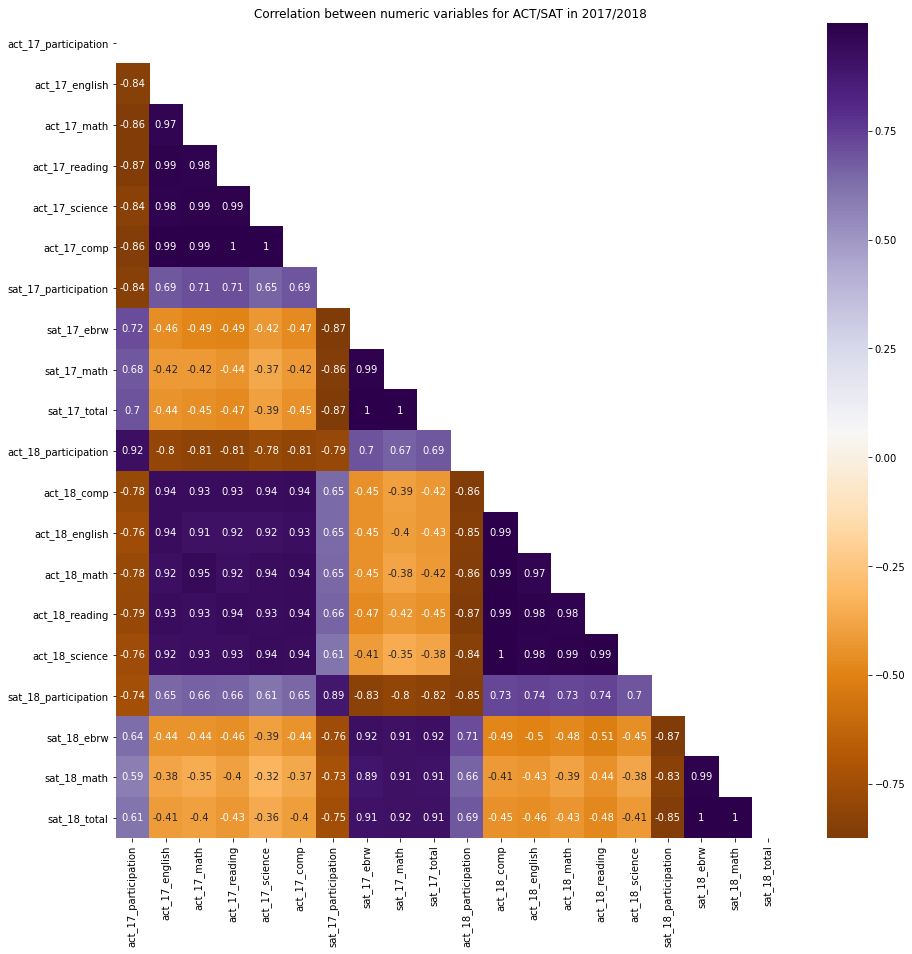

In [49]:
plt.figure(figsize=(15,15))
plt.title('Correlation between numeric variables for ACT/SAT in 2017/2018')
sns.heatmap(final.corr(), mask=mask, annot=True, fmt='.2g', cmap='PuOr');

The heatmap reinforces our thought that the participation rates for both tests are inversely related to their average total scores (highlighted by the strong negative correlation here). Conversely, there are strong positive correlations for the subject scores between years, which suggest that there were no major fluctuations to the individual subject averages across the years.

#### Define a custom function to subplot histograms


In [50]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize=(15,10), \
                       sharex=False, sharey=True, bins=10, kde=True):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize, sharex=sharex, sharey=sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        # Classify graph (ACT/SAT) by color
        if 'act_' in column:
            color = 'paleturquoise'
        elif 'sat_' in column:
            color = 'palegreen'
        
        sns.histplot(dataframe, x=column, ax=ax[i], color=color, bins=bins, kde=kde)
        # Inserting vertical line indicating mean
        ax[i].axvline(dataframe[list_of_columns[i]].mean(), ls='dotted', color='lightcoral')
           
        # Setting titles & labels here for each subplot
        nl = '\n' # Assigning newline to a variable that can be called in the f string
        ax[i].set_title(list_of_titles[i] + f'{nl}Mean = {round(dataframe[list_of_columns[i]].mean(), 1)}')
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('No of States')
         
    fig.tight_layout()

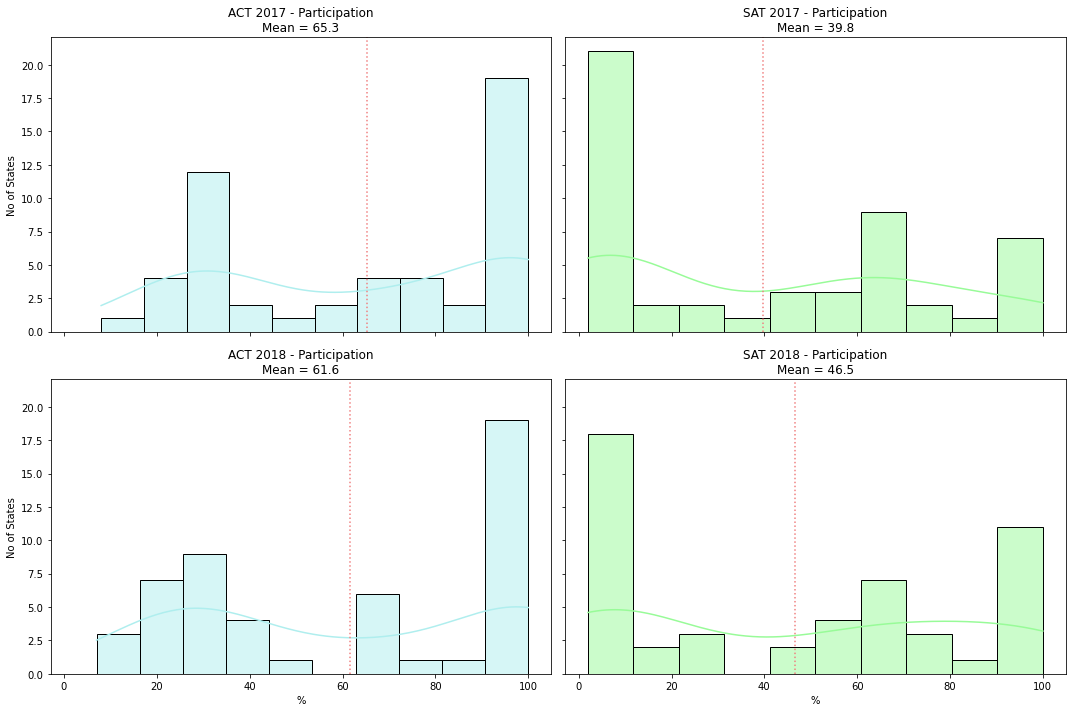

In [51]:
# Plotting participation rates for SAT & ACT
subplot_histograms(
    final,
    ['act_17_participation', 'sat_17_participation', 'act_18_participation', 'sat_18_participation'],
    ['ACT 2017 - Participation', 'SAT 2017 - Participation', 'ACT 2018 - Participation', 'SAT 2018 - Participation'],
    ['%', '%', '%', '%'],
    sharex=True,
)

Our first observation is that the mean participation rates for the ACT is greater than that for the SAT in both years, which suggests that the ACT is a more popular testing format. However, across the years, the mean for the ACT actually dropped from 65.3 to 61.6, which the mean for the SAT increased from 39.8 to 46.5, which suggests that the SAT is gaining popularity.

The distributions for both test formats are approximately bimodal, which indicates that the states usually have either a low participation rate or a high one. This makes sense as state legislations usually favor one particular test, which conversely makes the other much less popular.

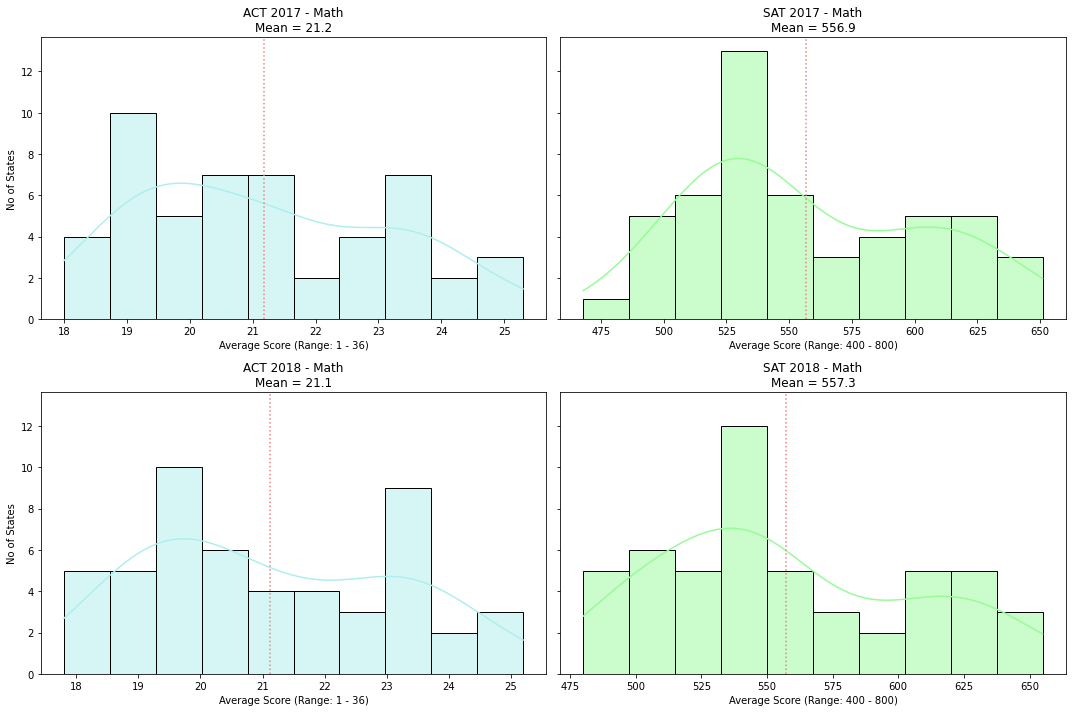

In [52]:
# Plotting average Math scores for SAT & ACT
subplot_histograms(
    final,
    ['act_17_math', 'sat_17_math', 'act_18_math', 'sat_18_math'],
    ['ACT 2017 - Math', 'SAT 2017 - Math', 'ACT 2018 - Math', 'SAT 2018 - Math'],
    ['Average Score (Range: 1 - 36)', 'Average Score (Range: 400 - 800)', \
     'Average Score (Range: 1 - 36)', 'Average Score (Range: 400 - 800)'],
)

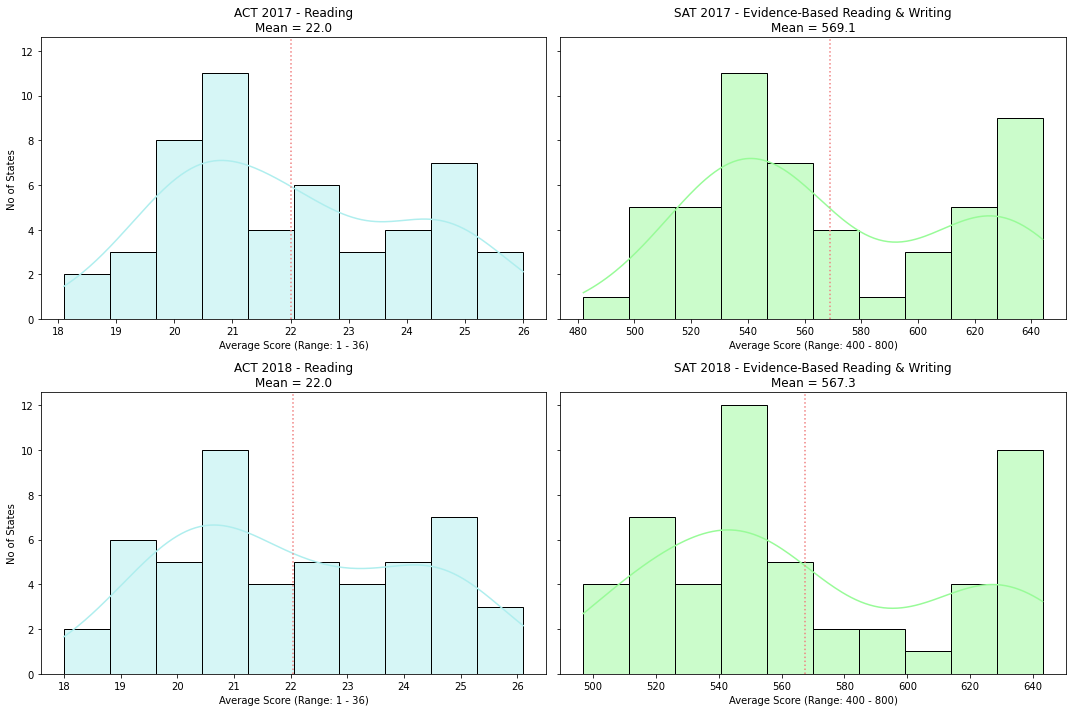

In [53]:
# Plotting average reading/verbal scores for SAT & ACT
subplot_histograms(
    final,
    ['act_17_reading', 'sat_17_ebrw', 'act_18_reading', 'sat_18_ebrw'],
    ['ACT 2017 - Reading', 'SAT 2017 - Evidence-Based Reading & Writing', \
     'ACT 2018 - Reading', 'SAT 2018 - Evidence-Based Reading & Writing'],
    ['Average Score (Range: 1 - 36)', 'Average Score (Range: 400 - 800)', \
     'Average Score (Range: 1 - 36)', 'Average Score (Range: 400 - 800)'],
)

For both Math & Reading scores, a similar trend that can be observed is that the distribution for the SAT is more bimodal than that of the ACT. There are a higher number of states with more extreme high averages for the SAT when compared to the ACT. These are likely the states with the very low participation rates as explored earlier.

#### Plot and interpret scatter plots


In [54]:
def subplot_scatter(dataframe, list_of_x, list_of_y, list_of_titles, list_of_xlabels, list_of_ylabels, \
                    figsize=(15,8), sharex=False, sharey=False):
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize, sharex=sharex, sharey=sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_x): # Gives us an index value to get into all our lists      
        sns.regplot(data=dataframe, x=list_of_x[i], y=list_of_y[i], ax=ax[i], marker='x', \
                    line_kws={'color':'lightcoral'})
           
        # Setting titles & labels here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
         
    fig.tight_layout()

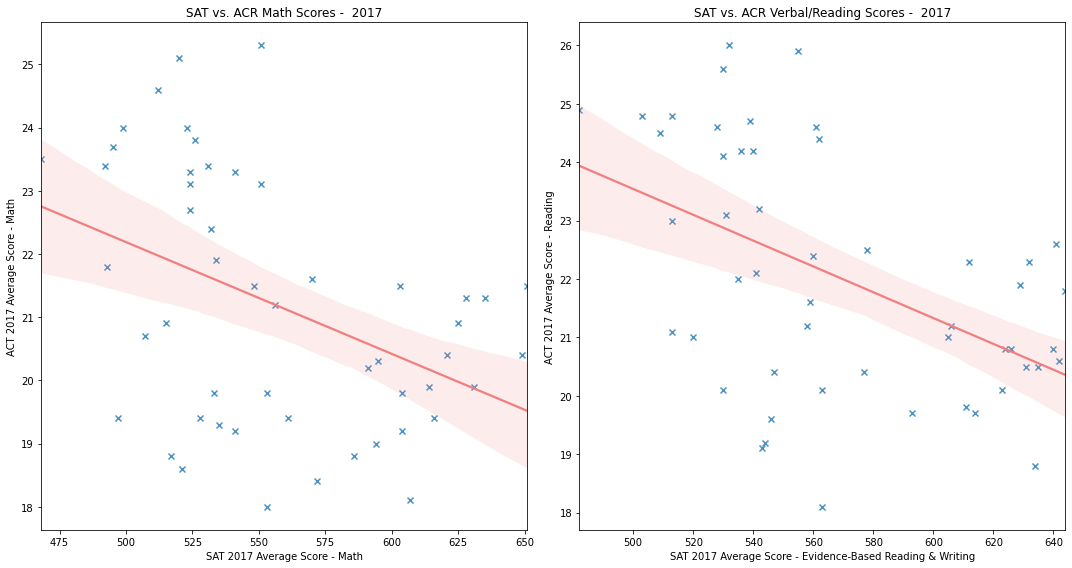

In [55]:
# Plotting average math & reading/verbal scores for SAT & ACT
subplot_scatter(
    final,
    ['sat_17_math', 'sat_17_ebrw'],
    ['act_17_math', 'act_17_reading'],
    ['SAT vs. ACR Math Scores -  2017', 'SAT vs. ACR Verbal/Reading Scores -  2017'],
    ['SAT 2017 Average Score - Math', 'SAT 2017 Average Score - Evidence-Based Reading & Writing'],
    ['ACT 2017 Average Score - Math', 'ACT 2017 Average Score - Reading'],
)

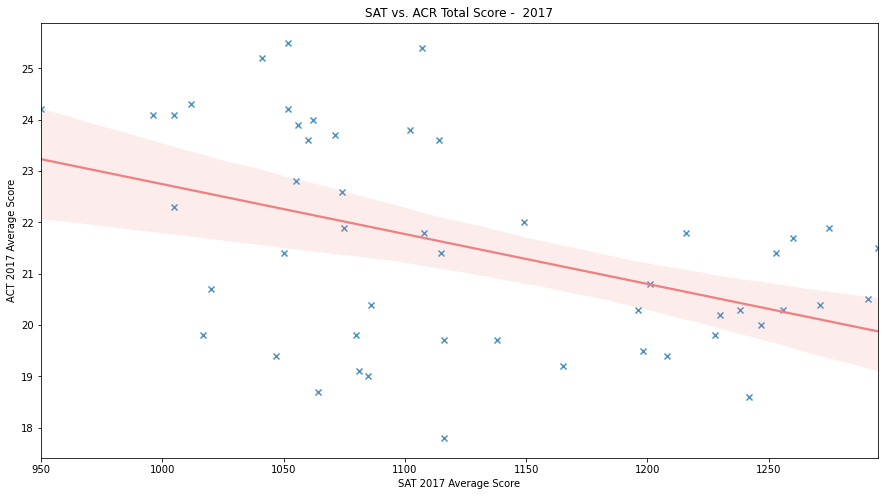

In [56]:
# Plotting average total/composite scores for SAT & ACT
plt.figure(figsize=(15,8))

sns.regplot(
    data=final,
    x='sat_17_total',
    y='act_17_comp',
    marker='x',
    line_kws={'color':'lightcoral'},
)

plt.title('SAT vs. ACR Total Score -  2017')
plt.xlabel('SAT 2017 Average Score')
plt.ylabel('ACT 2017 Average Score');

The scatter plots suggest that the ACT and SAT scores for similar subjects are *negatively correlated* to each other, i.e. states with higher SAT scores tend to have lower ACT scores, and vice versa. This could be due to the fact that the higher scores are from the minority of students taking the less popular test.

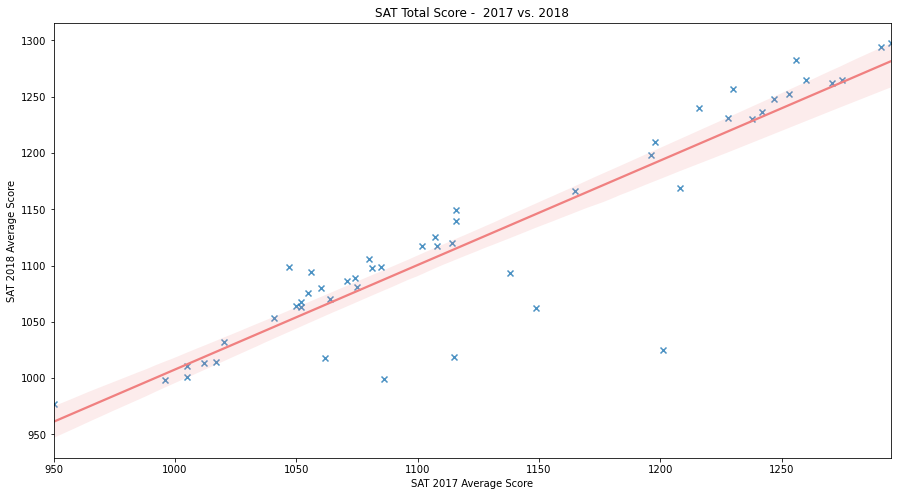

In [57]:
# Plotting average total scores for SAT in 2017/2018
plt.figure(figsize=(15,8))

sns.regplot(
    data=final,
    x='sat_17_total',
    y='sat_18_total',
    marker='x',
    line_kws={'color':'lightcoral'},
)

plt.title('SAT Total Score -  2017 vs. 2018')
plt.xlabel('SAT 2017 Average Score')
plt.ylabel('SAT 2018 Average Score');

SAT scores between the years have a *strong positive correlation*, which means that the scores between years generally do not fluctuate by much.

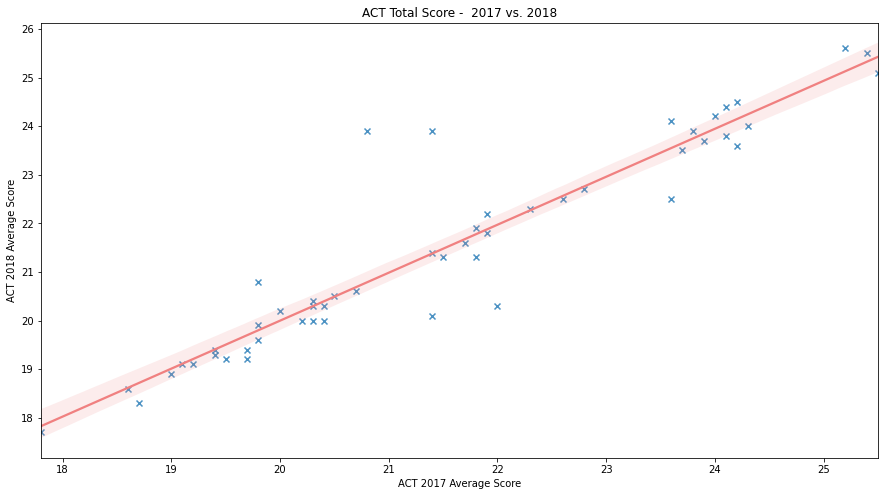

In [58]:
# Plotting average composite scores for ACT in 2017/2018
plt.figure(figsize=(15,8))

sns.regplot(
    data=final,
    x='act_17_comp',
    y='act_18_comp',
    marker='x',
    line_kws={'color':'lightcoral'},
)

plt.title('ACT Total Score -  2017 vs. 2018')
plt.xlabel('ACT 2017 Average Score')
plt.ylabel('ACT 2018 Average Score');

Similarly, the ACT scores between years also have a *strong positive correlation*. It can be observed that it is even stronger than that of the SAT, which suggest that the ACT scores over the years are more stable. This could be due to the fact that the SAT format was recently changed, so there would be relatively more changes as states and schools adjust their teaching methods to the new format.

#### Plot and interpret boxplots

In [61]:
def subplot_box(dataframe, list_of_columns, title, xlabel, list_of_ylabels, figsize=(15,8)):
    
    plt.figure(figsize=figsize)
    # Classify graph (ACT/SAT) by color
    color_pal = {ylabel: 'paleturquoise' if 'act_' in ylabel else 'palegreen' \
                 for ylabel in dataframe.columns.unique()}
    ax = sns.boxplot(data=dataframe[list_of_columns], palette=color_pal, orient='h')      
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_yticklabels(list_of_ylabels)
    plt.tight_layout()

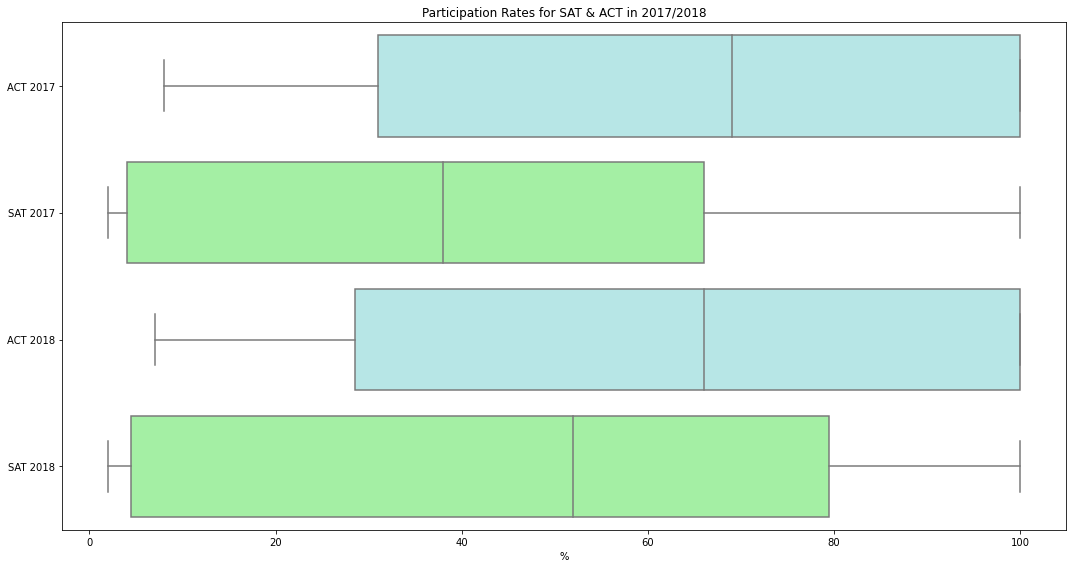

In [63]:
# Plotting participation rates for SAT & ACT in 2017/2018
subplot_box(
    final,
    ['act_17_participation', 'sat_17_participation', 'act_18_participation', 'sat_18_participation'],
    'Participation Rates for SAT & ACT in 2017/2018',
    '%',
    ['ACT 2017', 'SAT 2017', 'ACT 2018', 'SAT 2018'],
)

The median participation for the ACT test is higher than that of the SAT for both years, and the participation rates for the ACT are skewed right as compared to the SAT which are skewed left. This suggests that the ACT is the more popular test in the USA.

One noticeable change from 2017 to 2018 is the inter-quartile range for the SAT which increased and shifted to the right. This suggests an increase in popularity of the testing format.

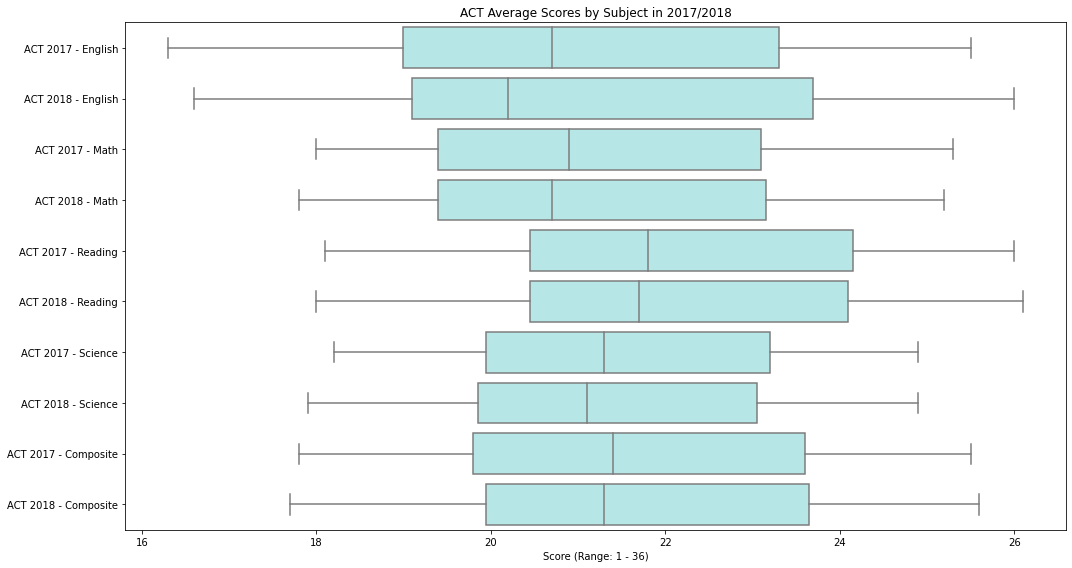

In [64]:
# Plotting average scores for ACT in 2017/2018
subplot_box(
    final,
    ['act_17_english', 'act_18_english', 'act_17_math', 'act_18_math', 'act_17_reading', \
     'act_18_reading', 'act_17_science', 'act_18_science', 'act_17_comp', 'act_18_comp'],
    'ACT Average Scores by Subject in 2017/2018',
    'Score (Range: 1 - 36)',
    ['ACT 2017 - English', 'ACT 2018 - English', 'ACT 2017 - Math', 'ACT 2018 - Math', \
     'ACT 2017 - Reading', 'ACT 2018 - Reading', 'ACT 2017 - Science', 'ACT 2018 - Science', \
     'ACT 2017 - Composite', 'ACT 2018 - Composite'],
)

The median scores for all subjects fell in 2018 as compared to the year before, which suggests that the students are performing worse. This could be due to numerous factors such as difficulty of the tests that year. Another trend to note is that reading was the subject with the highest median and was skewed right the most, which suggests that it is the 'easiest' subject.

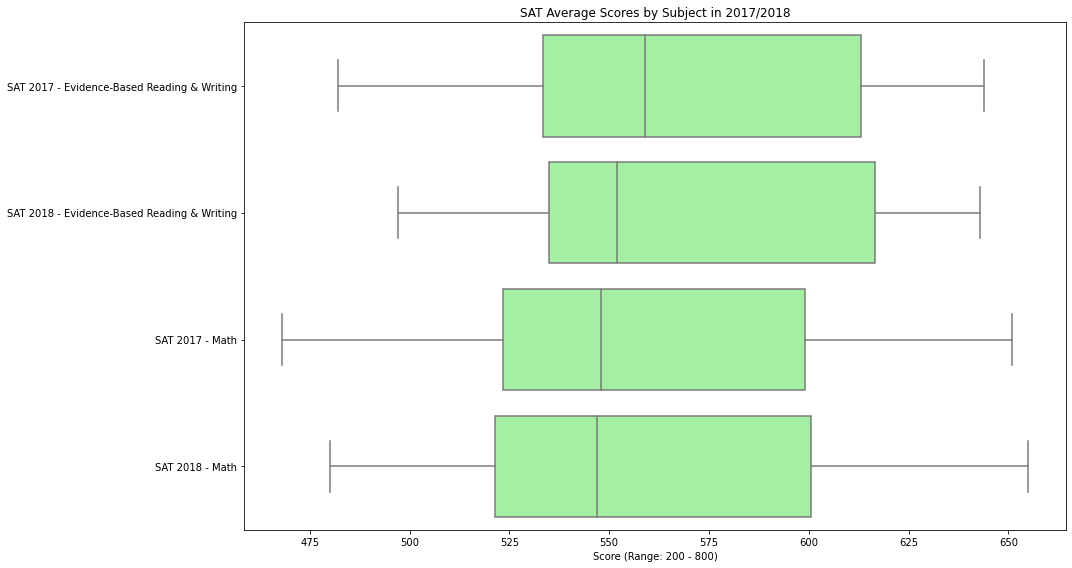

In [65]:
# Plotting average scores for SAT in 2017/2018
subplot_box(
    final,
    ['sat_17_ebrw', 'sat_18_ebrw', 'sat_17_math', 'sat_18_math'],
    'SAT Average Scores by Subject in 2017/2018',
    'Score (Range: 200 - 800)',
    ['SAT 2017 - Evidence-Based Reading & Writing', 'SAT 2018 - Evidence-Based Reading & Writing', \
     'SAT 2017 - Math', 'SAT 2018 - Math'],
)

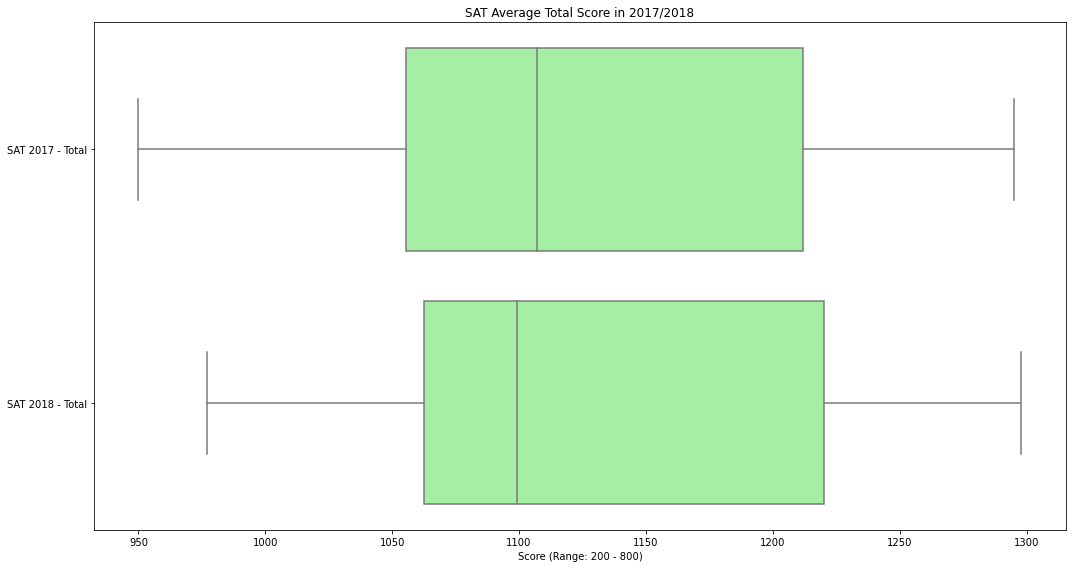

In [66]:
# Plotting average total scores for SAT in 2017/2018
subplot_box(
    final,
    ['sat_17_total', 'sat_18_total'],
    'SAT Average Total Score in 2017/2018',
    'Score (Range: 200 - 800)',
    ['SAT 2017 - Total', 'SAT 2018 - Total']
)

Similarly, median scores for both subjects for the SAT fell in 2018, which suggests that students are performing worse. Another reason could be due to the increase in number of students taking the SAT.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [67]:
final[['sat_17_participation', 'sat_18_participation', \
       'act_17_participation', 'act_18_participation']].describe()

,sat_17_participation,sat_18_participation,act_17_participation,act_18_participation
count,51.000000,51.00000,51.000000,51.000000
mean,39.803922,46.54902,65.254902,61.647059
std,35.276632,37.97542,32.140842,34.080976
min,2.000000,2.00000,8.000000,7.000000
25%,4.000000,4.50000,31.000000,28.500000
50%,38.000000,52.00000,69.000000,66.000000
75%,66.000000,79.50000,100.000000,100.000000
max,100.000000,100.00000,100.000000,100.000000


**Participation Rates**

- **Central Tendency**
    1. SAT - Central tendency shifted to the right in 2018 (Mean increased by 16.9%, Median increased by 36.8%)
    2. ACT - Central tendency shifted to the left in 2018 (Mean decreased by 5.5%, Median decreased by 4.3%)

- **Spread**
    1. SAT - Standard Deviation increased by 7.6% in 2018
    2. ACT - Standard Deviation increased by 6.0% in 2018
    
- **Shape/Skewness**
    1. SAT - Bimodal, skewed right
    2. ACT - Bimodal, skewed slightly left

In [68]:
final[['sat_17_math', 'sat_18_math', 'act_17_math', 'act_18_math']].describe()

,sat_17_math,sat_18_math,act_17_math,act_18_math
count,51.000000,51.000000,51.000000,51.000000
mean,556.882353,557.254902,21.182353,21.125490
std,47.121395,48.887562,1.981989,2.035765
min,468.000000,480.000000,18.000000,17.800000
25%,523.500000,521.500000,19.400000,19.400000
50%,548.000000,547.000000,20.900000,20.700000
75%,599.000000,600.500000,23.100000,23.150000
max,651.000000,655.000000,25.300000,25.200000


**Average Math Scores**

- **Central Tendency**
    1. SAT - Central tendency relatively unchanged in 2018 (Mean increased by <1%, Median decreased by <1%)
    2. ACT - Central tendency relatively unchanged in 2018 (Mean decreased by <1%, Median decreased by <1%)

- **Spread**
    1. SAT - Standard Deviation increased by 3.7% in 2018
    2. ACT - Standard Deviation increased by 2.5% in 2018
    
- **Shape/Skewness**
    1. SAT - Approximately bimodal, skewed slightly right
    2. ACT - Approximately bimodal, skewed slightly right

In [69]:
final[['sat_17_ebrw', 'sat_18_ebrw', 'act_17_reading', 'act_18_reading']].describe()

,sat_17_ebrw,sat_18_ebrw,act_17_reading,act_18_reading
count,51.000000,51.000000,51.000000,51.000000
mean,569.117647,567.294118,22.013725,22.033333
std,45.666901,45.317676,2.067271,2.164132
min,482.000000,497.000000,18.100000,18.000000
25%,533.500000,535.000000,20.450000,20.450000
50%,559.000000,552.000000,21.800000,21.700000
75%,613.000000,616.500000,24.150000,24.100000
max,644.000000,643.000000,26.000000,26.100000


**Average Reading Scores**

- **Central Tendency**
    1. SAT - Central tendency relatively unchanged in 2018 (Mean decreased by <1%, Median decreased by 1.3%)
    2. ACT - Central tendency relatively unchanged in 2018 (Mean increased by <1%, Median decreased by <1%)

- **Spread**
    1. SAT - Standard Deviation decreased by <1% in 2018
    2. ACT - Standard Deviation increased by 4.7% in 2018
    
- **Shape/Skewness**
    1. SAT - Approximately bimodal, skewed slightly right
    2. ACT - Approximately bimodal, skewed slightly right

In [70]:
final[['sat_17_total', 'sat_18_total', 'act_17_comp', 'act_18_comp']].describe()

,sat_17_total,sat_18_total,act_17_comp,act_18_comp
count,51.000000,51.000000,51.000000,51.000000
mean,1126.098039,1124.705882,21.519608,21.498039
std,92.494812,93.820103,2.020695,2.117686
min,950.000000,977.000000,17.800000,17.700000
25%,1055.500000,1062.500000,19.800000,19.950000
50%,1107.000000,1099.000000,21.400000,21.300000
75%,1212.000000,1220.000000,23.600000,23.650000
max,1295.000000,1298.000000,25.500000,25.600000


**Average Total/Composite Scores**

- **Central Tendency**
    1. SAT - Central tendency relatively unchanged in 2018 (Mean decreased by <1%, Median decreased by <1%)
    2. ACT - Central tendency relatively unchanged in 2018 (Mean decreased by <1%, Median decreased by <1%)

- **Spread**
    1. SAT - Standard Deviation increased by 1.4% in 2018
    2. ACT - Standard Deviation increased by 4.8% in 2018
    
- **Shape/Skewness**
    1. SAT - Approximately bimodal, skewed slightly right
    2. ACT - Approximately bimodal, skewed slightly right

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

No, in this dataset we have observed that a bimodal distribution is prevalent in most of our analysis cases. This is due to the fact that the data collected is neither random nor independent. The data encompasses the entire set of ACT/SAT scores from each state and are grouped by states, and as such have different values depending on the state's legislation, student population size, etc. 

If we were to sample our data based on equal groups of students regardless of their state, we are more likely to get a normally distributed sample then.

Does This Assumption Hold for:
   - Math
   - Reading
   - Rates
  
Explain your answers for each distribution and how you think this will affect estimates made from these data.

The assumption does not hold due to the reasons stated above. All the subjects/fields are affected by the reason, and so estimates from these data will be affected by them as well. Including the population of students per state would help to normalise the data as currently, it gives an equal weightage to each state regardless of their size.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 


Yes, to a certain extent. These two tests constitute the majority of the population of high school students in each state, and as such can be studied to see the trends between states. However, the usefulness is restricted as there would be no data from other timeframes to back up any claims or inferences made. Additionally, you would need more fields of data to contextualise the participation rates. For example, any average scores would allow you to analyse the relationship between participation rates and the scores.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

No, as it is too specific to study an individual subject across only two years. Math scores are heavily influenced by the difficulty of the paper, and it is almost impossible to deduce a trend give only two separate datasets.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [71]:
# Comparing the relationship between average composite scores and participation rates for ACT 2017
X = final['act_17_participation']
y = final['act_17_comp'] # independent variable

X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            act_17_comp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           8.54e-16
Time:                        08:39:04   Log-Likelihood:                -73.737
No. Observations:                  51   AIC:                             151.5
Df Residuals:                      49   BIC:                             155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.0402      0.335     74.794      0.000      24.367      25.713
act_17_participation    -0.0540      0.005    -11.700      0.000      -0.063      -0.045
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.523
Skew:                          -0.203   Prob(JB):                        0.467
Kurtosis:                       2.257   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For this case, the null hypothesis would be: Are all coefficients zero?

The low P(F-statistic) suggests that at least one feature predicts y, the independent variable. The P>|t| value of 0 also suggests a strong correlation between the variables.

In this case, we can reject the null hypothesis as the probability of it being true given that we observed the dataset in this notebook is extremely low (<0.05)

## Outside Research

The first interesting trend we find is for states which had massive jumps in SAT participation rates - Colorado (11% to 100%) and Illinois (9% to 99%). This was due to legislative changes that made the SAT compulsory, which explains these trends. [Colorado](https://www.testive.com/colorado-sat-change-2017/) & [Illinois](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html). Conversely, their ACT participation rates fell significantly (100% to 70% for Colorado, 93% to 43% for Illinois). This is mainly due to the fact that majority of students only take one of the two tests.

In [73]:
# States with <10% SAT participation rate in 2018, sorted by average total score
final.loc[final['sat_18_participation'] < 10, ['sat_18_total', 'sat_18_participation']]\
    .sort_values(by='sat_18_total')

,sat_18_total,sat_18_participation
state,,
Oklahoma,1099,8
Alabama,1166,6
Arkansas,1169,5
Louisiana,1210,4
Utah,1230,4
Tennessee,1231,6
Mississippi,1236,3
South Dakota,1240,3
Kentucky,1248,4


Another interesting state that defied a trend we observed was Oklahoma. Despite the trend that states with lower SAT participation having higher average total scores, Oklahoma's mean score was by far the lowest amongst states with <10% SAT participation rates in 2018. This could be due to the fact that Oklahoma has [no requirement](https://sde.ok.gov/college-and-career-readiness-assessments) for mandatory SAT testing and as such, the schools do not spend many resources on preparing for the SAT.

## Conclusions and Recommendations

Based on the exploration of the data, we know that the participation rates for SAT and ACT tend to mirror each other within a state. The states with the most extreme differences in rates are those with legislations in place that make on of the two tests [compulsory](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent). Meanwhile, participation rates and average scores for the tests tend to be inversely correlated, but this may just be due to selective bias as the low participation rates likely reflect the students who willingly take the optional test, and are of a higher caliber.

Additionally, the biggest factor in influencing participation rates outside of legislation is [money](https://www.chicagotribune.com/news/breaking/ct-iillinois-act-exam-met-20170414-story.html). States which switched over and sponsored a certain test for a year tended to have a higher participation rate that year as well.

With these in mind, it is recommended that the college board should invest more resources into *Oklahoma* to raise SAT participation rates there. One thing to note is to spend the money wisely, and the most effective way would probably be to lobby for legislation making the SAT compulsory in the state as that has been observed to be the greatest factor in increasing participation rates.

Some additional data that could help improve the analysis would include:
- Education Budgets by state
- Poverty rates by state
- Race/Religion statistics by state